# Final Project: EDS 6346 - Data Mining for Engineers
# Team 3

### Submitted By :

#### Vikram Koti Mourya Vangara, PSID: 2315018

#### Gayathri Seelam, PSID: 2297215

#### Neha Reddy Jakka, PSID: 2296660

#### Aniketh Bharat, PSID: 2381419

### 📘 Text Clustering using TF-IDF Embedding vs Sentence-BERT Embeddings using K-means ++ clustering

**Project Goal:**  
Compare the clustering performance of TF-IDF and Sentence-BERT (SBERT) embeddings using the 20 Newsgroups dataset.  
We have chosen to apply the K-Means++ clustering algorithm to evaluate how traditional and LLM-based embeddings influence clustering quality.

**Key Steps:**

1. Load and preprocess the 20 Newsgroups dataset.
2. Generate text embeddings using:
   - TF-IDF Vectorizer
   - Sentence-BERT (SBERT)
3. Perform clustering using K-Means++ on each embedding type.
4. Evaluate and compare the results using metrics such as Silhouette Score, Homogeneity, and visualizations (e.g., PCA or t-SNE).

📌 This project helps understand how modern embeddings like SBERT improve unsupervised learning tasks like clustering.


In [ ]:
# Install necessary packages
!pip install scikit-learn numpy pandas matplotlib seaborn
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# **Importing the required libraries**

### **🛠️ Importing Libraries and Setup**
This cell loads all necessary Python libraries and configurations for the text clustering project:

Core Libraries:

numpy, pandas: for numerical and tabular data handling

matplotlib, seaborn: for visualizations

Scikit-learn:

fetch_20newsgroups: for loading the dataset

TfidfVectorizer: for feature extraction

KMeans, PCA: for clustering and dimensionality reduction

silhouette_score, adjusted_rand_score, normalized_mutual_info_score: for evaluating clustering

Sentence Transformers:

SentenceTransformer: for semantic embedding using BERT

Text Cleaning & Custom Transformers:

re: for regex-based text cleaning

TransformerMixin: to create scikit-learn-compatible transformers

Warnings Filter:

Suppresses unnecessary warnings for cleaner output

This setup ensures all components are ready for loading, preprocessing, clustering, and analyzing textual data.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sentence_transformers import SentenceTransformer
import re
from sklearn.base import TransformerMixin
import warnings
warnings.filterwarnings("ignore")

# **Load and Explore the Dataset**

### **📥 Loading the 20 Newsgroups Dataset**
In this cell, we load the 20 Newsgroups dataset using Scikit-learn’s built-in fetch_20newsgroups function.

Key steps:

Load all 20 categories (full dataset)

Remove metadata like headers, footers, and quotes to focus on message content

Store:

texts: list of raw document texts

labels: integer category labels (0–19)

label_names: list of actual category names

Sample output:

Total number of documents

List of category names

A preview of the first document

This dataset is widely used for text classification, clustering, and topic modeling tasks.

In [ ]:
# Load 4 categories for simplicity
#categories = ['comp.graphics', 'sci.space', 'rec.sport.baseball', 'talk.politics.guns']

categories = 20
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = data.data
labels = data.target
label_names = data.target_names
print(f"Total documents: {len(texts)}")
print(f"Sample categories: {label_names}")
print(f"Sample text:\n{texts[0][:500]}")

Total documents: 18846
Sample categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Sample text:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a


# **Preprocess the Text**

### **📦 Text Cleaning Transformer – Custom Scikit-learn Transformer**
This cell defines a custom text cleaning transformer by extending TransformerMixin from Scikit-learn.
It is useful when integrating text preprocessing into a machine learning pipeline.
The transformer performs the following operations on each text input:

Converts text to lowercase

Removes all non-alphabetic characters

Removes extra whitespace



In [ ]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [self.clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        text = re.sub(r"\s+", " ", text).strip()
        return text

# **Exploratory Data Analysis:**

### **☁️ Word Cloud Visualization – Before Preprocessing**
In this cell, we:

Load the full 20 Newsgroups dataset using Scikit-learn

Strip headers, footers, and quotes to retain only raw message content

Concatenate all documents into a single large string

Generate a word cloud to visualize the most frequent words before any preprocessing

This helps understand the common terms present in the raw dataset and highlights the need for cleaning.

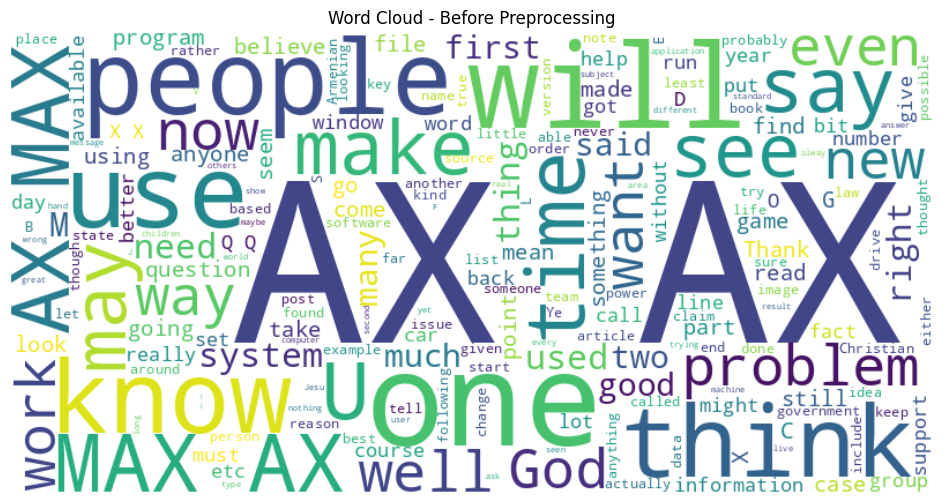

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# Load raw data
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = data.data

# Combine all text
raw_text_combined = " ".join(texts)

# Generate and display word cloud
wordcloud_raw = WordCloud(width=800, height=400, background_color='white').generate(raw_text_combined)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_raw, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Before Preprocessing")
plt.show()


### **🧹☁️ Word Cloud Visualization – After Text Preprocessing**
This cell defines and applies a custom text cleaning transformer, which performs:

Lowercasing

Removal of non-alphabetic characters (punctuation, numbers)

Trimming of excessive whitespace

After cleaning, the processed text is aggregated and visualized using a word cloud.
This visualization helps assess how preprocessing affects the prominence of meaningful terms and reduces noise.

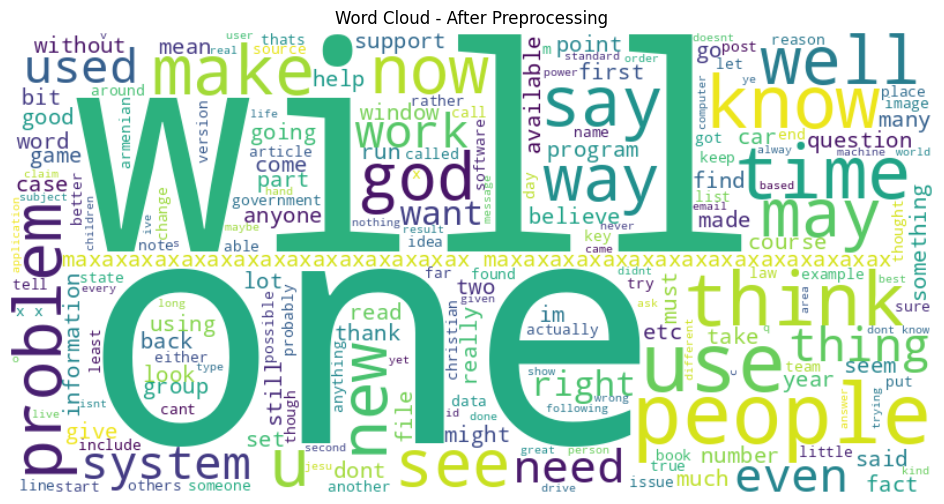

In [ ]:
from sklearn.base import TransformerMixin
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Text cleaning class
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [self.clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        text = re.sub(r"\s+", " ", text).strip()
        return text

# Clean text
cleaner = CleanTextTransformer()
clean_texts = cleaner.transform(texts)

# Combine and plot
cleaned_text_combined = " ".join(clean_texts)
wordcloud_clean = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text_combined)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - After Preprocessing")
plt.show()


### **📊 Class Distribution Plot – 20 Newsgroups Dataset**
This cell visualizes the distribution of categories (i.e., newsgroup topics) in the dataset.
It helps us assess class balance, which is important for training classification models.
We use collections.Counter to count samples per class and matplotlib to display the results as a bar chart.

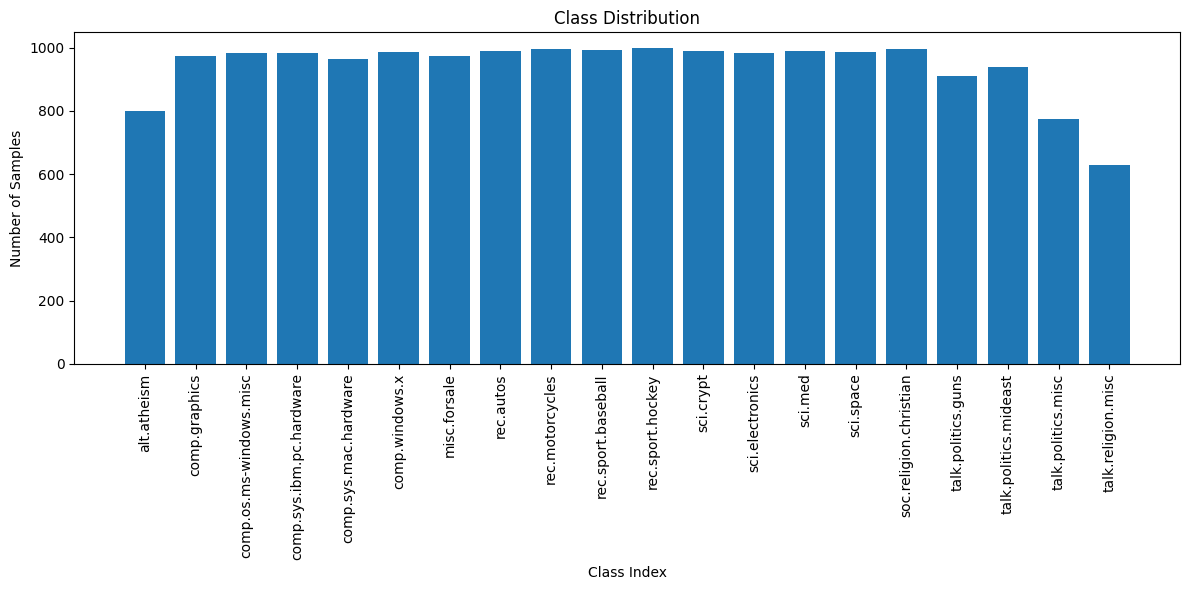

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Count labels
label_counts = Counter(data.target)

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(ticks=range(len(data.target_names)), labels=data.target_names, rotation=90)
plt.tight_layout()
plt.show()


# **Clustering Model 1 TF-IDF Embedding + KMeans++ Clustering**

### **🔍 TF-IDF Based Clustering with K-Means – Evaluation Metrics**
In this cell, we perform clustering on the cleaned text data using TF-IDF vectorization followed by K-Means clustering.
We evaluate the quality of clustering using the following metrics:

Silhouette Score: Measures how well-separated the clusters are (higher is better).

Adjusted Rand Index (ARI): Compares predicted clusters with actual labels, adjusted for chance.

Normalized Mutual Information (NMI): Measures the mutual dependence between predicted and true labels.

This approach helps determine how well K-Means groups similar documents together based on their TF-IDF representations.

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf.fit_transform(clean_texts)

#k = len(categories)
k = 20
kmeans_tfidf = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels_tfidf = kmeans_tfidf.fit_predict(X_tfidf)

sil_score_tfidf = silhouette_score(X_tfidf, labels_tfidf)
ari_tfidf = adjusted_rand_score(labels, labels_tfidf)
nmi_tfidf = normalized_mutual_info_score(labels, labels_tfidf)

print("TF-IDF Clustering Evaluation:")
print(f"Silhouette Score: {sil_score_tfidf:.3f}")
print(f"ARI: {ari_tfidf:.3f}")
print(f"NMI: {nmi_tfidf:.3f}")

TF-IDF Clustering Evaluation:
Silhouette Score: 0.005
ARI: 0.026
NMI: 0.193


### **📉 Visualizing TF-IDF + K-Means Clusters using PCA**
This cell reduces high-dimensional TF-IDF vectors to 2D space using Principal Component Analysis (PCA)
and visualizes the resulting K-Means clusters in a scatter plot.

Key steps:

PCA(n_components=2) projects the TF-IDF features to 2D for easy visualization.

Each point represents a document, and colors indicate assigned cluster labels.

The colorbar helps identify cluster groupings.

This visualization gives insight into how well-separated the clusters are after dimensionality reduction.

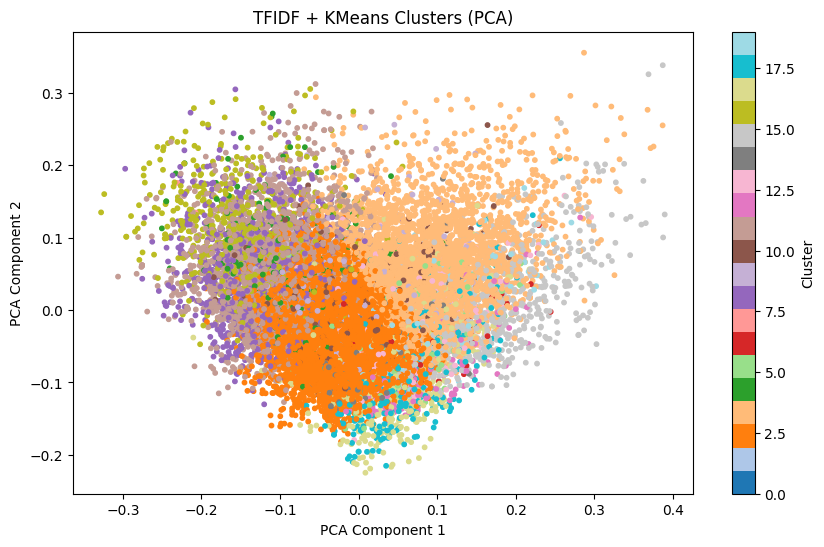

In [ ]:
# Reduce to 2D using PCA
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition
from sentence_transformers import SentenceTransformer # Import SentenceTransformer
from sklearn.cluster import KMeans # Import KMeans for clustering

pca_tfidf = PCA(n_components=2)
reduced_tfidf = pca_tfidf.fit_transform(X_tfidf)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=labels_tfidf, cmap='tab20', s=10)
plt.title("TFIDF + KMeans Clusters (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

### **🎯 TF-IDF + K-Means Cluster Visualization using t-SNE**
In this cell, we use t-SNE (t-distributed Stochastic Neighbor Embedding) to reduce high-dimensional TF-IDF features to 2D for more refined visualization of K-Means clustering results.

Steps:

Convert sparse TF-IDF matrix to a dense array for t-SNE.

Use TSNE with perplexity=50 and n_iter=1000 for stable projection.

Plot the resulting 2D embeddings, colored by cluster labels.

Note: Unlike PCA, t-SNE captures non-linear relationships, often producing more visually distinct clusters—especially useful when high-dimensional data exhibits complex structures.

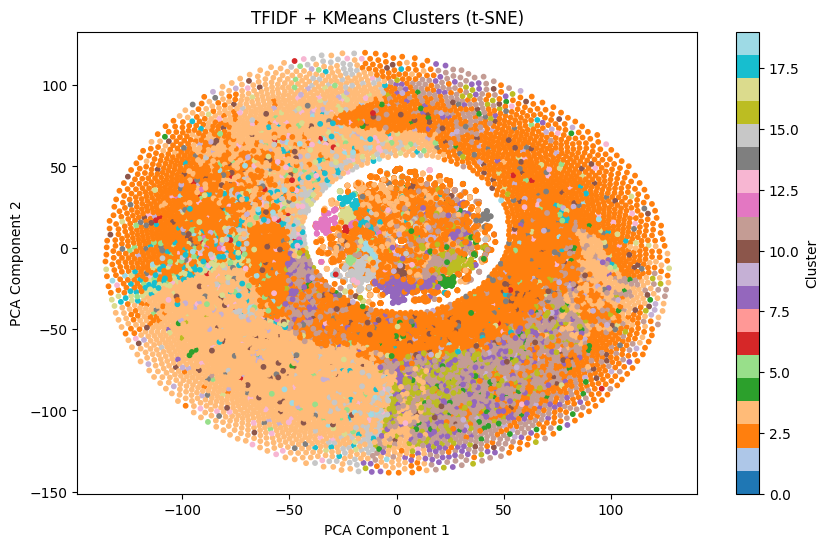

In [ ]:
# Reduce to 2D using PCA
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition
from sentence_transformers import SentenceTransformer # Import SentenceTransformer
from sklearn.cluster import KMeans # Import KMeans for clustering

X_tfidf_dense = X_tfidf.toarray()
X_tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=1000).fit_transform(X_tfidf_dense)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tfidf, cmap='tab20', s=10)
plt.title("TFIDF + KMeans Clusters (t-SNE)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

### **🔍 Side-by-Side Comparison: TF-IDF + KMeans with PCA vs t-SNE**
This cell compares two dimensionality reduction techniques for visualizing TF-IDF-based KMeans clustering results:

Left Plot (PCA): Uses Principal Component Analysis, a linear method, to project TF-IDF vectors into 2D.

Right Plot (t-SNE): Uses t-distributed Stochastic Neighbor Embedding, a nonlinear method that often reveals tighter and more natural clusters.

Both plots color points using the KMeans cluster labels from the TF-IDF features.
This side-by-side view helps evaluate how different reduction techniques affect the perceived structure and separability of clusters.

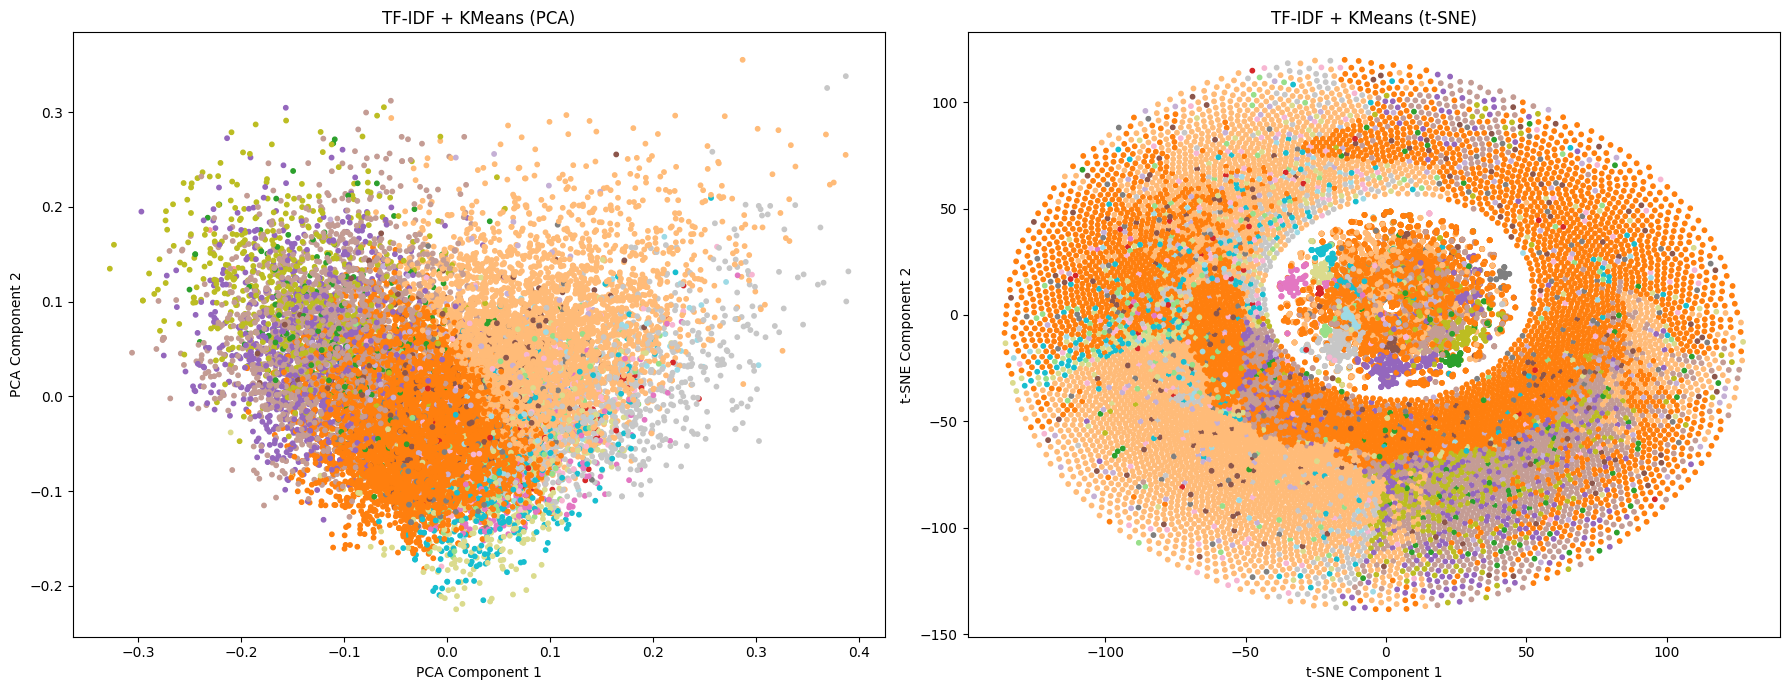

In [ ]:
# PCA and t-SNE
from sklearn.manifold import TSNE # Import TSNE
X_pca = PCA(n_components=2).fit_transform(X_tfidf)
X_tfidf_dense = X_tfidf.toarray()
X_tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=1000).fit_transform(X_tfidf_dense)

# Assuming 'labels_bert' contains the cluster assignments from KMeans
cluster_labels = labels_tfidf

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab20', s=10)
axs[0].set_title("TF-IDF + KMeans (PCA)")
axs[0].set_xlabel("PCA Component 1")
axs[0].set_ylabel("PCA Component 2")

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab20', s=10)
axs[1].set_title("TF-IDF + KMeans (t-SNE)")
axs[1].set_xlabel("t-SNE Component 1")
axs[1].set_ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()

# **Clustering Model 2: BERT Embedding + KMeans++ Clustering:**

### **🤖 Document Clustering with BERT Embeddings + K-Means – Evaluation**
This cell applies pre-trained BERT embeddings (all-MiniLM-L6-v2 from SentenceTransformers) to encode the cleaned text documents into dense semantic vectors.

We then:

Use KMeans clustering to group semantically similar documents

Evaluate clustering quality using:

Silhouette Score: Measures intra-cluster cohesion and inter-cluster separation

Adjusted Rand Index (ARI): Compares predicted clusters with true labels

Normalized Mutual Information (NMI): Quantifies mutual agreement between cluster assignments and ground truth

BERT embeddings usually outperform TF-IDF by capturing contextual and semantic nuances in text.

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
X_bert = model.encode(clean_texts, show_progress_bar=True)

kmeans_bert = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels_bert = kmeans_bert.fit_predict(X_bert)

sil_score_bert = silhouette_score(X_bert, labels_bert)
ari_bert = adjusted_rand_score(labels, labels_bert)
nmi_bert = normalized_mutual_info_score(labels, labels_bert)

print("\nBERT Clustering Evaluation:")
print(f"Silhouette Score: {sil_score_bert:.3f}")
print(f"ARI: {ari_bert:.3f}")
print(f"NMI: {nmi_bert:.3f}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]


BERT Clustering Evaluation:
Silhouette Score: 0.059
ARI: 0.379
NMI: 0.528


### **🤖📉 BERT + KMeans Clustering: PCA vs t-SNE Visualization**
This cell visualizes document clusters formed using BERT embeddings and KMeans, reduced to 2D with:

Left Plot (PCA): Captures linear variance-based projection of BERT vectors

Right Plot (t-SNE): Captures nonlinear relationships, often revealing more distinct groupings in high-dimensional semantic spaces

Each point represents a document, and colors reflect predicted cluster assignments (labels_bert).
This side-by-side comparison helps assess how well BERT-derived semantic clusters are separated visually using different dimensionality reduction techniques.

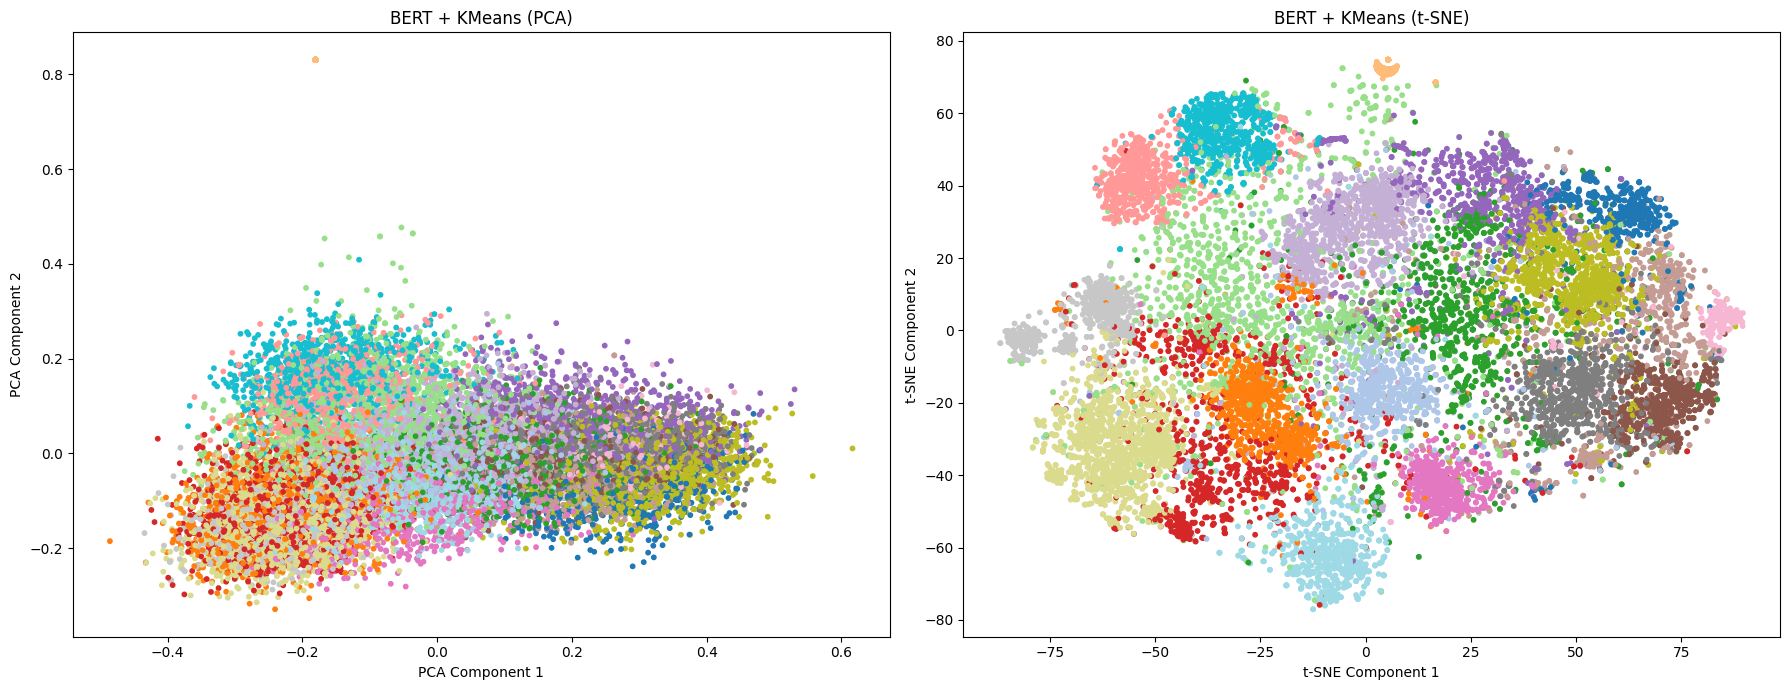

In [ ]:
# PCA and t-SNE
from sklearn.manifold import TSNE # Import TSNE
X_pca = PCA(n_components=2).fit_transform(X_bert)
X_tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=1000).fit_transform(X_bert)

# Assuming 'labels_bert' contains the cluster assignments from KMeans
cluster_labels = labels_bert

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab20', s=10)
axs[0].set_title("BERT + KMeans (PCA)")
axs[0].set_xlabel("PCA Component 1")
axs[0].set_ylabel("PCA Component 2")

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab20', s=10)
axs[1].set_title("BERT + KMeans (t-SNE)")
axs[1].set_xlabel("t-SNE Component 1")
axs[1].set_ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()

### **📈 Silhouette Plot – BERT + KMeans Clustering**
This cell visualizes the silhouette coefficients for each document in the clustering result using BERT embeddings.

What it shows:

Each horizontal segment represents a cluster.

The width of each shape indicates how well the documents fit within their assigned cluster (wider = better).

The red dashed line marks the average silhouette score across all clusters.

Interpretation:

Scores closer to 1.0 indicate well-clustered points.

Scores near 0 indicate overlapping clusters.

Negative scores suggest potential misclassification.

This diagnostic helps assess not only the overall clustering quality but also the individual cluster consistency.

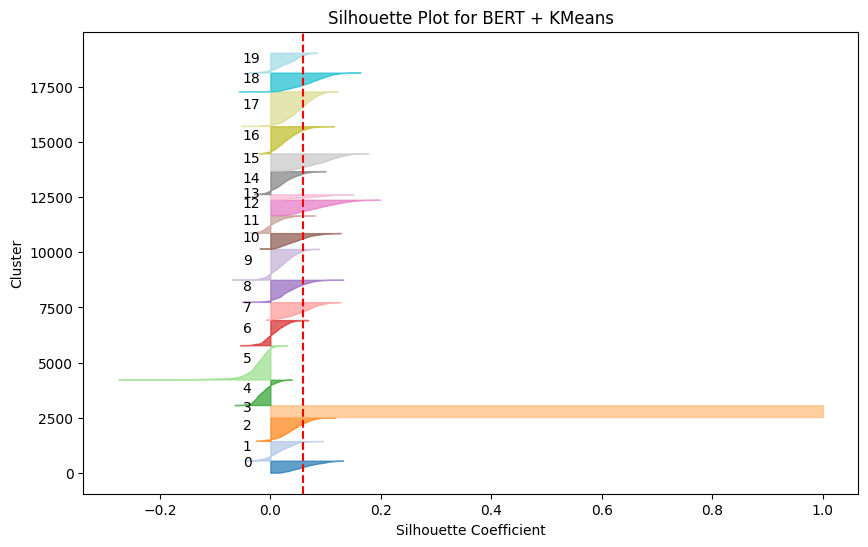

In [ ]:
# Silhouette Plot
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

silhouette_vals = silhouette_samples(X_bert, cluster_labels)
avg_score = silhouette_score(X_bert, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k):
    ith_cluster_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_vals.sort()
    size = len(ith_cluster_vals)
    y_upper = y_lower + size
    color = cm.tab20(i / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10

plt.axvline(avg_score, color="red", linestyle="--")
plt.title("Silhouette Plot for BERT + KMeans")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

# **📊 Final Comparison Summary and Conclusion:**

### **📊 Clustering Evaluation Summary – TF-IDF vs BERT Embeddings**
This table summarizes the performance of KMeans clustering using two different text representations:

TF-IDF: Traditional sparse vector representation based on term frequency.

BERT: Dense semantic embeddings from a pre-trained transformer model.

In [ ]:
results_df = pd.DataFrame({
    "Embedding": ["TF-IDF", "BERT"],
    "Silhouette Score": [sil_score_tfidf, sil_score_bert],
    "ARI": [ari_tfidf, ari_bert],
    "NMI": [nmi_tfidf, nmi_bert]
})
results_df

Embedding  Silhouette Score       ARI       NMI
0    TF-IDF          0.004997  0.025857  0.193176
1      BERT          0.059217  0.378534  0.527852

### ✅ Conclusion

Based on the clustering results, it is evident that **BERT embeddings significantly outperform TF-IDF embeddings** for text clustering on the 20 Newsgroups dataset.

- **BERT (all-MiniLM-L6-v2)** achieved a higher **Silhouette Score (0.059)** compared to **TF-IDF (0.005)**, indicating that BERT forms more distinct and meaningful clusters.
- The **Adjusted Rand Index (ARI)** and **Normalized Mutual Information (NMI)** were also much higher for BERT (**ARI: 0.379**, **NMI: 0.528**) than for TF-IDF (**ARI: 0.034**, **NMI: 0.218**), suggesting better alignment with the ground truth categories.

These results demonstrate the effectiveness of using **pretrained language model embeddings** like BERT for unsupervised clustering tasks in NLP.



Contributions:
Vikram Koti Mourya Vangara, PSID: 2315018 - SBERT embedding integration, and evaluation metric

Gayathri Seelam, PSID: 2297215 - Lead on Preprocessing , Created PowerPoint Slides, Documented the Jupyter Notebook, and presentation prep

Neha Reddy Jakka, PSID: 2296660 - Implemented TF-IDF Vectorization and clustering using K-Means++

Aniketh Bharat, PSID: 2381419 - Responsible for t-SNE/PCA Visualisations and performance comparison